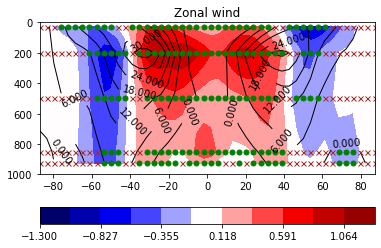

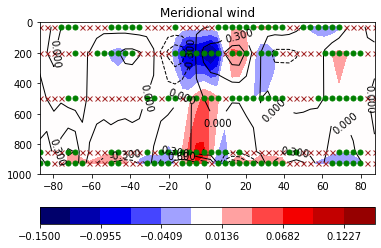

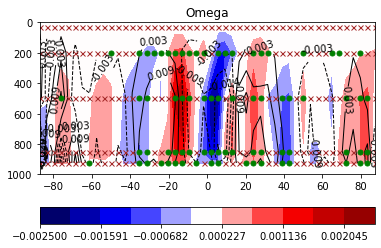

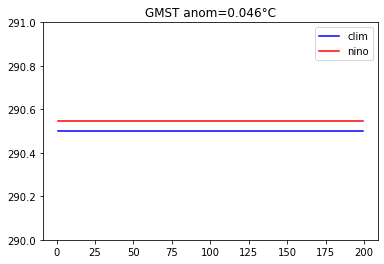

In [23]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Oct 22 10:41:30 2022

@author: Paolo
"""
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy

proj=ccrs.PlateCarree(central_longitude=180)
proj0=ccrs.PlateCarree(0)

seas='DJF'
DIR='./Data/' #path to directory with NetCDF files 
FILEclim_djf=DIR+seas+'mean_clim.nc' #Full path with file name
FILEnino_djf=DIR+seas+'mean_nino.nc' #Full path with file name

seas='JJA'
DIR='./Data/' #path to directory with NetCDF files 
FILEclim_jja=DIR+seas+'mean_clim.nc' #Full path with file name
FILEnino_jja=DIR+seas+'mean_nino.nc' #Full path with file name

ncin=Dataset(FILEclim_djf,'r')
chi_djf=ncin.variables['chi'][:]
psi_djf=ncin.variables['psi'][:]
u_djf=ncin.variables['u'][:]
v_djf=ncin.variables['v'][:]
tp_djf=ncin.variables['tp'][:]
temp0_djf=ncin.variables['temp0'][:]
omega_djf=ncin.variables['omega'][:]
lon=ncin.variables['lon'][:]
lat=ncin.variables['lat'][:]
lev=ncin.variables['lev'][:]
ncin.close()

ncin=Dataset(FILEclim_jja,'r')
chi_jja=ncin.variables['chi'][:]
psi_jja=ncin.variables['psi'][:]
u_jja=ncin.variables['u'][:]
v_jja=ncin.variables['v'][:]
tp_jja=ncin.variables['tp'][:]
temp0_jja=ncin.variables['temp0'][:]
omega_jja=ncin.variables['omega'][:]
ncin.close()

ncin_nino=Dataset(FILEnino_djf,'r')
chi_nino_djf=ncin_nino.variables['chi'][:]
psi_nino_djf=ncin_nino.variables['psi'][:]
u_nino_djf=ncin_nino.variables['u'][:]
v_nino_djf=ncin.variables['v'][:]
tp_nino_djf=ncin_nino.variables['tp'][:]
temp0_nino_djf=ncin_nino.variables['temp0'][:]
omega_nino_djf=ncin_nino.variables['omega'][:]
ncin_nino.close()

ncin_nino=Dataset(FILEnino_jja,'r')
chi_nino_jja=ncin_nino.variables['chi'][:]
psi_nino_jja=ncin_nino.variables['psi'][:]
u_nino_jja=ncin_nino.variables['u'][:]
v_nino_jja=ncin.variables['v'][:]
tp_nino_jja=ncin_nino.variables['tp'][:]
temp0_nino_jja=ncin_nino.variables['temp0'][:]
omega_nino_jja=ncin_nino.variables['omega'][:]
ncin_nino.close()

#South America
las,lan=-25,-5
low,loe=290,320
#Europe
low,loe=0,40
las,lan=55,75
#Central America
low,loe=240,270
las,lan=20,40
def generate_zonal_fields(field_jja, field_djf, field_nino_jja, field_nino_djf):
    field_zonal = np.nanmean((field_jja+field_djf)/2, axis=3)
    field_zonal_mean = np.mean(field_zonal, axis=0)

    field_zonal_nino = np.nanmean((field_nino_jja+field_nino_djf)/2, axis=3)
    field_zonal_nino_mean = np.mean(field_zonal_nino, axis=0)

    return field_zonal_mean, field_zonal_nino_mean

u_zonal_mean, u_zonal_nino_mean = generate_zonal_fields(u_jja, u_djf, u_nino_jja, u_nino_djf)
v_zonal_mean, v_zonal_nino_mean = generate_zonal_fields(v_jja, v_djf, v_nino_jja, v_nino_djf)
omega_zonal_mean, omega_zonal_nino_mean = generate_zonal_fields(omega_jja, omega_djf, omega_nino_jja, omega_nino_djf)
#u_zonal_nino_mean=(u_jja[178:198,:,:,:]+u_djf[178:198,:,:,:])/2
#u_zonal_nino_mean=np.mean(u_zonal_nino_mean,axis=3)
#u_zonal_nino_mean=np.mean(u_zonal_nino_mean,axis=0)
def t_test(field,field_zonal_mean,field_zonal_nino_mean,ax,x_lat,y_lev):
    nyears=199

    
    vds1=Dataset('./Data/varzonalmean_clim.nc')
    valc=vds1.variables[field][0,:,:,0] 
    vds2=Dataset('./Data/varzonalmean_nino.nc')
    vala=vds2.variables[field][0,:,:,0]
    var=1/2.*(valc+vala)

    diff=field_zonal_nino_mean-field_zonal_mean
    sigma=(var*2/(nyears))**0.5
    test=np.divide(diff,sigma)
    control=np.zeros([5,48])

    

 

    for i in range(5):
        #print(i,diff[i,10],sigma[i,10]) 
        for n in range(48):
            if (diff[i,n]>2.5*sigma[i,n] or  diff[i,n]<-2.5*sigma[i,n]) and abs(diff[i,n])>0.0001:
                #print(i,n,test[i,n])
                control[i,n]=1
                ax.plot(x_lat[i,n],y_lev[i,n], marker='o', markersize=5, color='green')
            else:
                control[i,n]=0
                ax.plot(x_lat[i,n],y_lev[i,n], marker='x', markersize=5, color='brown')
                #print(i,n,control[i,n])
    return 0

fig,ax=plt.subplots(1,1)
x_lat, y_lev = np.meshgrid(lat, lev)
t_test('u',u_zonal_mean,u_zonal_nino_mean,ax,x_lat,y_lev)
#t = ax.plot(x_lat,y_lev,control, marker='o', markersize=3, color='black')
c = ax.contour(x_lat,y_lev,u_zonal_mean,colors='k',linewidths=1)
cf = ax.contourf(x_lat, y_lev, u_zonal_nino_mean - u_zonal_mean,
              cmap='seismic', levels=np.linspace(-1.3,1.3,12))
ax.clabel(c, inline=True, fontsize=10)
ax.set_ylim([0,1000])

#c=ax[1].contourf(x_lat,y_lev,u_zonal_nino_mean,cmap='seismic')
plt.colorbar(cf, ax=ax, orientation='horizontal')
plt.gca().invert_yaxis()
plt.title("Zonal wind")
plt.savefig("u_zonal_anomaly.png")
fig,ax=plt.subplots(1,1)
t_test('v',v_zonal_mean,v_zonal_nino_mean,ax,x_lat,y_lev)
c = ax.contour(x_lat,y_lev,v_zonal_mean,colors='k',linewidths=1)
cf = ax.contourf(x_lat, y_lev, v_zonal_nino_mean - v_zonal_mean,
              cmap='seismic', levels=np.linspace(-0.15,0.15,12))
ax.clabel(c, inline=True, fontsize=10)
ax.set_ylim([0,1000])

#c=ax[1].contourf(x_lat,y_lev,u_zonal_nino_mean,cmap='seismic')
plt.colorbar(cf, ax=ax, orientation='horizontal')
plt.gca().invert_yaxis()
plt.title("Meridional wind")
plt.savefig("v_zonal_anomaly.png")

fig,ax=plt.subplots(1,1)
t_test('omega',omega_zonal_mean,omega_zonal_nino_mean,ax,x_lat,y_lev)
c = ax.contour(x_lat,y_lev,omega_zonal_mean,colors='k',linewidths=1, levels=np.linspace(-0.02,0.02,8))
cf = ax.contourf(x_lat, y_lev, omega_zonal_nino_mean - omega_zonal_mean,
              cmap='seismic', levels=np.linspace(-0.0025,0.0025,12))
ax.clabel(c, inline=True, fontsize=10)
ax.set_ylim([0,1000])

#c=ax[1].contourf(x_lat,y_lev,u_zonal_nino_mean,cmap='seismic')
plt.colorbar(cf, ax=ax, orientation='horizontal')
plt.gca().invert_yaxis()
plt.title("Omega")
plt.savefig("omega_zonal_anomaly.png")


fig,ax=plt.subplots(1,1)
ly=199
symtemp=np.zeros([ly])
symtemp1=np.zeros([ly])
x=np.linspace(1,ly,ly)
rfn='./Data/sst-annualseries-clim.nc'
rds=Dataset(rfn)
symtemp[:]= rds.variables['sst'][:,0,0]  
sfn='./Data/sst-annualseries-nino.nc'
sds=Dataset(sfn)
symtemp1[:]= sds.variables['sst'][:,0,0] 
ax.plot(x,symtemp,color='b',label='clim')
ax.plot(x,symtemp1, color='r',label='nino')
ax.set_ylim([290,291])
plt.legend()
plt.title("GMST anom={:.3f}°C".format(symtemp1[100]-symtemp[100]))

plt.savefig("GMST_sereis.png")

